In [51]:
##Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns

In [52]:
df=pd.read_csv('WineQT.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [53]:
df.shape

(1143, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [55]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [56]:
df.isnull() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [58]:
median=df.median()
median

fixed acidity             7.90000
volatile acidity          0.52000
citric acid               0.25000
residual sugar            2.20000
chlorides                 0.07900
free sulfur dioxide      13.00000
total sulfur dioxide     37.00000
density                   0.99668
pH                        3.31000
sulphates                 0.62000
alcohol                  10.20000
quality                   6.00000
Id                      794.00000
dtype: float64

In [59]:
#removing outlier (noise in data)
import scipy.stats as stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
threshold =3
print("size before removing outliers:",df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df=df[(z_scores <= threshold).all(axis=1)]
print("size before removing outliers:",df.shape)

size before removing outliers: (1143, 13)
size before removing outliers: (1041, 13)


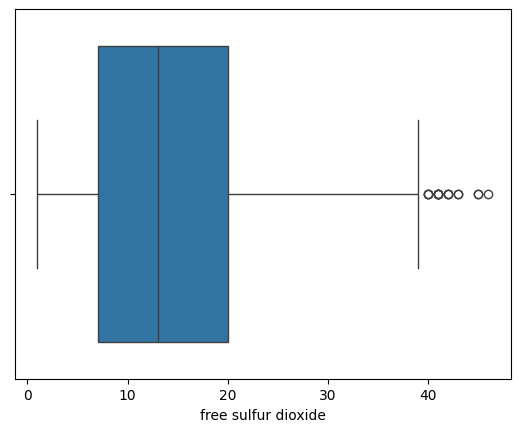

In [60]:
sns.boxplot(x=df['free sulfur dioxide'])

plt.show()

In [61]:
y=df['quality'] # extracting last column as target features(dependent feature)
y
 

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1041, dtype: int64

In [62]:
np.unique(y)

array([4, 5, 6, 7, 8], dtype=int64)

In [63]:
df['quality'].value_counts()

quality
5    440
6    425
7    131
4     30
8     15
Name: count, dtype: int64

In [64]:
x=df.drop('quality',axis=1) 

x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [65]:
x.shape,y.shape

((1041, 12), (1041,))

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,
                                                    stratify=y, random_state=42)

In [67]:
x_train.shape,x_test.shape

((728, 12), (313, 12))

In [68]:
y_train.shape,y_test.shape

((728,), (313,))

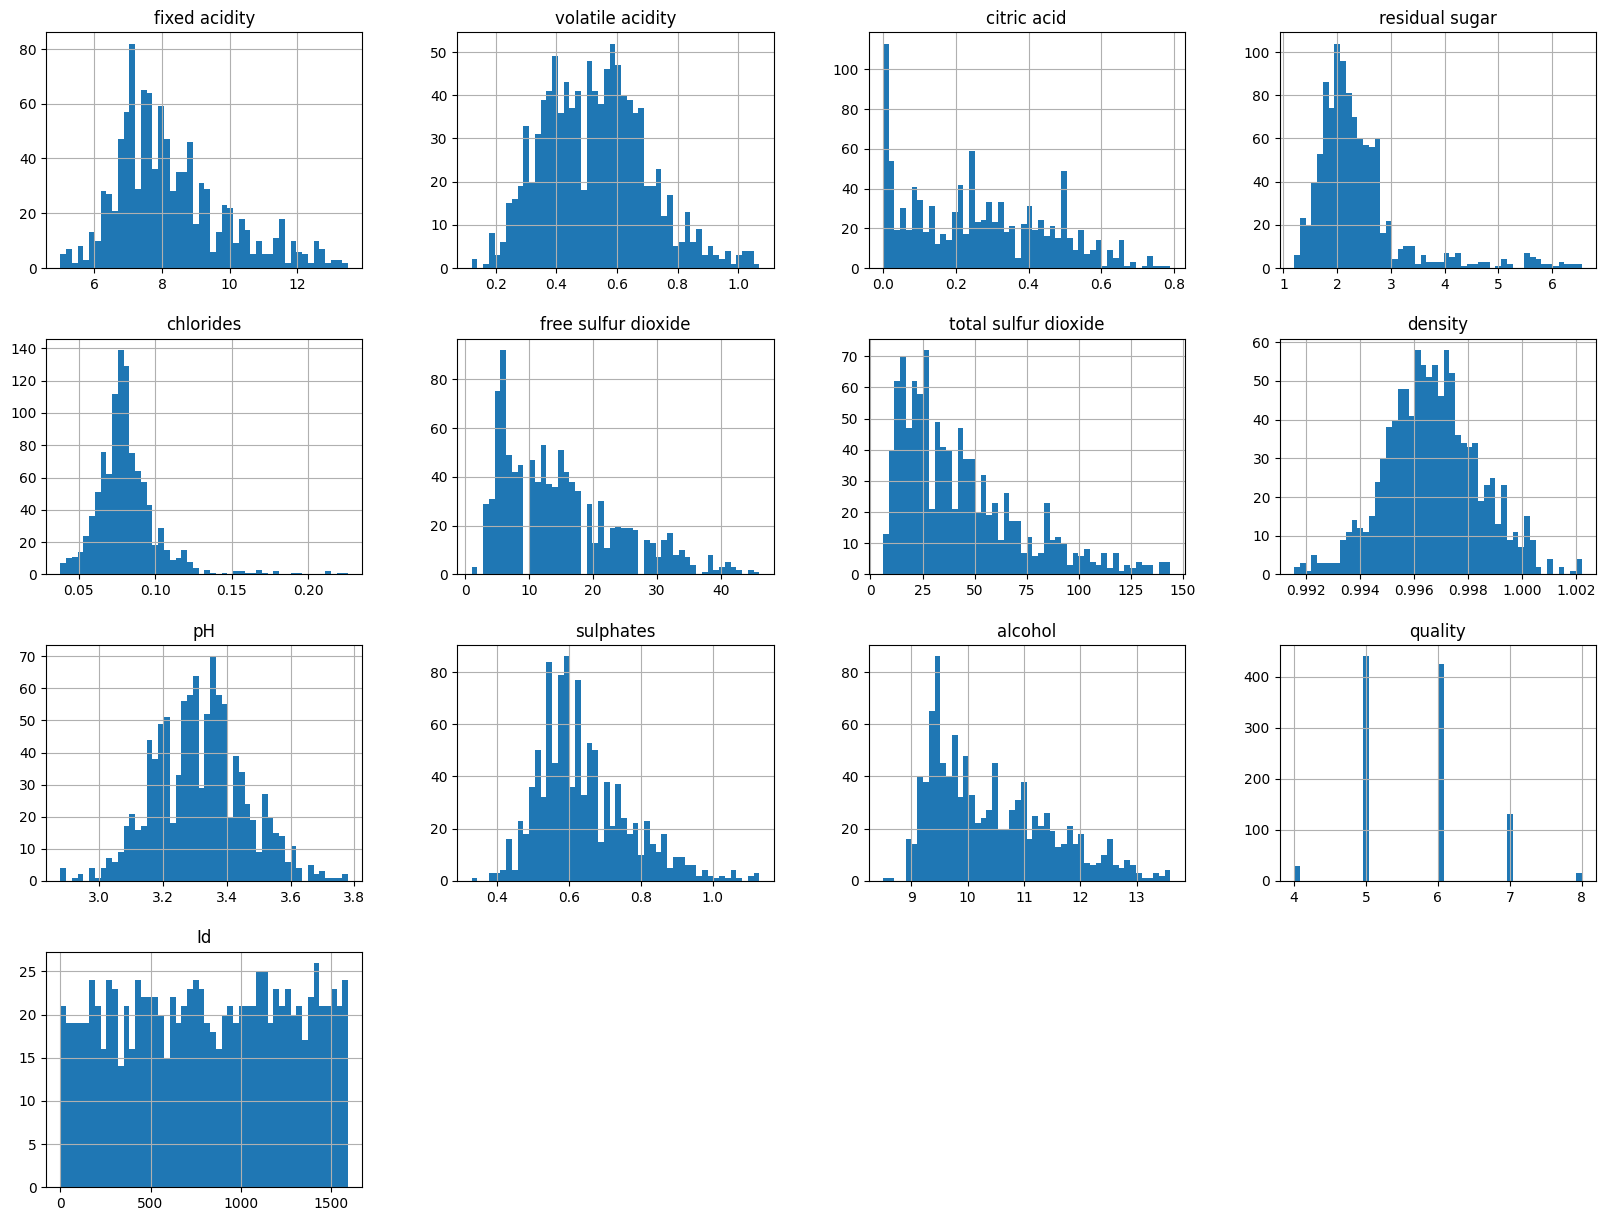

In [69]:
df.hist(bins=50, figsize=(20,15)) #trying to fit dataset in bin (20640%50=412 data in one bar)
plt.show()

In [70]:
correlation=df.corr()['quality']
correlation

fixed acidity           0.144304
volatile acidity       -0.373507
citric acid             0.266762
residual sugar          0.077245
chlorides              -0.129101
free sulfur dioxide    -0.077364
total sulfur dioxide   -0.236612
density                -0.157154
pH                     -0.075023
sulphates               0.401926
alcohol                 0.509040
quality                 1.000000
Id                      0.090223
Name: quality, dtype: float64

In [71]:
sorted_features=correlation.abs().sort_values(ascending=False)
sorted_features.head(10)

quality                 1.000000
alcohol                 0.509040
sulphates               0.401926
volatile acidity        0.373507
citric acid             0.266762
total sulfur dioxide    0.236612
density                 0.157154
fixed acidity           0.144304
chlorides               0.129101
Id                      0.090223
Name: quality, dtype: float64

In [72]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best=SelectKBest(score_func=f_classif,k=2)

X_new=k_best.fit_transform(x,y)
selected_indices=k_best.get_support(indices=True)
selected_features= df.columns[selected_indices]
selected_features

Index(['sulphates', 'alcohol'], dtype='object')

In [73]:
# Scale our data using StandardScaler:
standardscaler = StandardScaler()
x= standardscaler.fit_transform(x)
#x BECAUSE it is our training dataset
x


array([[-0.53724526,  1.0085398 , -1.35880196, ..., -0.6325366 ,
        -1.00648286, -1.75813346],
       [-0.29466347,  2.06479661, -1.35880196, ...,  0.30724066,
        -0.61755752, -1.75597303],
       [-0.29466347,  1.3606254 , -1.14999466, ...,  0.07229635,
        -0.61755752, -1.7538126 ],
       ...,
       [-1.26499062,  0.42173046, -0.94118736, ..., -0.47590706,
         0.06306182,  1.68559199],
       [-1.44692697,  0.12832579, -0.83678371, ...,  0.93375884,
         0.74368116,  1.68775242],
       [-1.44692697,  0.68579466, -0.73238006, ...,  0.54218498,
        -0.22863218,  1.69207328]])

In [74]:
correlation=df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.296045,0.700352,0.206969,0.196165,-0.157783,-0.102343,0.678620,-0.701971,0.196174,-0.023593,0.144304,-0.285393
volatile acidity,-0.296045,1.000000,-0.586477,0.012262,0.082798,0.017785,0.117950,-0.019505,0.235648,-0.363963,-0.208358,-0.373507,-0.029496
citric acid,0.700352,-0.586477,1.000000,0.215713,0.107235,-0.074016,-0.006489,0.388885,-0.509549,0.307067,0.168178,0.266762,-0.133016
residual sugar,0.206969,0.012262,0.215713,1.000000,0.093451,-0.019242,0.063467,0.343220,-0.078770,0.055738,0.193842,0.077245,-0.095171
chlorides,0.196165,0.082798,0.107235,0.093451,1.000000,-0.042546,0.057204,0.329172,-0.185002,0.004713,-0.234143,-0.129101,-0.144497
free sulfur dioxide,-0.157783,0.017785,-0.074016,-0.019242,-0.042546,1.000000,0.655243,-0.065922,0.105981,0.017462,-0.062852,-0.077364,0.088327
total sulfur dioxide,-0.102343,0.117950,-0.006489,0.063467,0.057204,0.655243,1.000000,0.099270,0.006074,-0.071416,-0.251443,-0.236612,-0.132666
density,0.678620,-0.019505,0.388885,0.343220,0.329172,-0.065922,0.099270,1.000000,-0.317353,0.117557,-0.452785,-0.157154,-0.415511
pH,-0.701971,0.235648,-0.509549,-0.078770,-0.185002,0.105981,0.006074,-0.317353,1.000000,-0.027228,0.160222,-0.075023,0.130624
sulphates,0.196174,-0.363963,0.307067,0.055738,0.004713,0.017462,-0.071416,0.117557,-0.027228,1.000000,0.247523,0.401926,-0.054309


<Axes: >

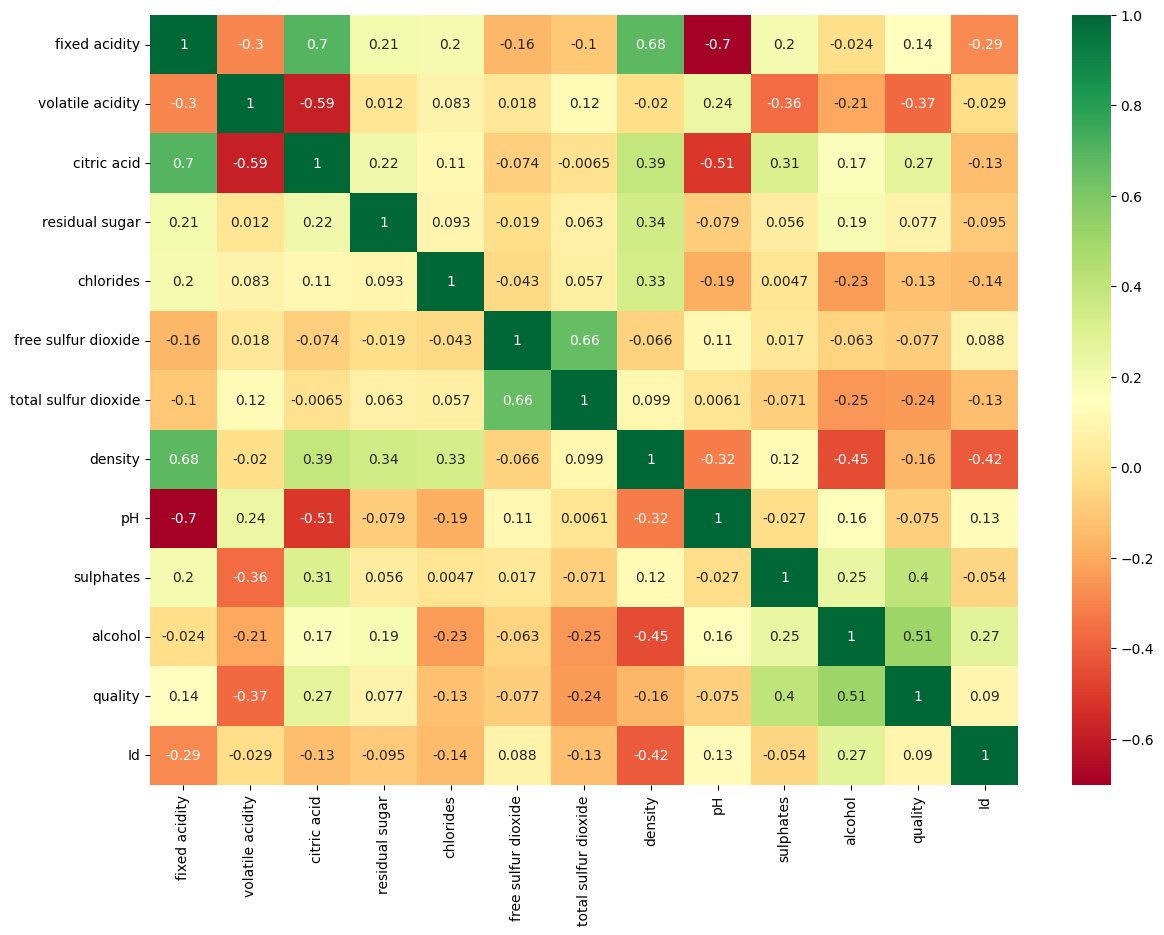

In [75]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":10})

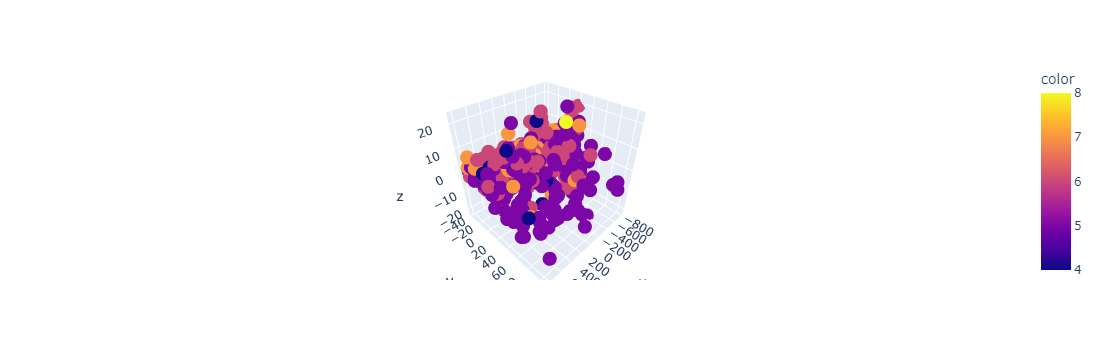

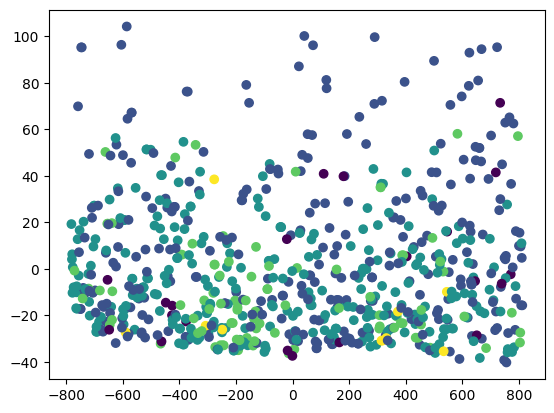

In [76]:
#Projection 8th question 20 marks PCA
from sklearn.decomposition import PCA
#build 2 dimentional projection
projector = PCA(n_components=3, whiten=False)

#build projection in train data
projection=projector.fit_transform(x_train)

projection.shape

plt.scatter(projection[:,0],projection[:,1],c=y_train)

#3dimention projection
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.scatter_3d(x=projection[:,0],y=projection[:,1],z=projection[:,2],color=y_train)
fig.show()

#As the yellow and purple are not seen scattered it is not seperable

In [77]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=100)

#fit model
forest.fit(x_train,y_train)

#prediction 
pred = forest.predict(x_test)

#predicted labels
pred[:10]

#Accuracy percentage
accuracy_percentage=100*np.sum(pred==y_test)/len(y_test)
accuracy_percentage

65.17571884984025

In [78]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [79]:
x=df.drop("quality",axis=1) 



y=df["quality"] # extracting last column as target features(dependent feature)

In [80]:
# using the model LinearRegression
LR_model=LinearRegression()

# fit model
LR_model.fit(x_train,y_train)

# Score X and Y - test and train

print("Score the x_train with y_train is : ", LR_model.score(x_train,y_train))
print("Score the x_test  with y_test  is : ", LR_model.score(x_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(x_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

Score the x_train with y_train is :  0.38372362581458475
Score the x_test  with y_test  is :  0.4122726641280978
 Model Evaluation Linear R : mean absolute error is  0.4698415338101382
 Model Evaluation Linear R : mean squared  error is  0.3650461716237305
 Model Evaluation Linear R : median absolute error is  0.3863152300710553


In [81]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(x_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the x_train with y_train is : ", Lo_model.score(x_train,y_train))
print("Score the x_test  with y_test  is : ", Lo_model.score(x_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(x_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the x_train with y_train is :  0.6057692307692307
Score the x_test  with y_test  is :  0.6006389776357828
 Model Evaluation Logistic R : mean absolute error is  0.43130990415335463
 Model Evaluation Logistic R : mean squared  error is  0.5015974440894568
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6006389776357828


In [82]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(x_train,y_train)

# Score X and Y - test and train

print("Score the x_train with y_train is : ", Tree_model.score(x_train,y_train))
print("Score the x_test  with y_test  is : ", Tree_model.score(x_test,y_test))

Score the x_train with y_train is :  0.9423076923076923
Score the x_test  with y_test  is :  0.5527156549520766


In [83]:
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.0419034  0.11915708 0.03201642 0.040799   0.10537038 0.05191494
 0.13291526 0.04801898 0.06516252 0.10072624 0.17863591 0.08337987]


In [84]:
np.savetxt('4aprilwine.txt',pred)